In [66]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

## Current Density - Overpotential Plot

In [161]:
#Constants
j0 = 0.00965
alphaa = 0.3
alphac = 0.7
R = 8.314
T = 298 
F = 96485
EEq = 0.771
z = 1
jmax = 600
A = 1 
CO1 = 1 
CR1 = 1 
kTO = 10**(-7)


def ExchangeCurrent(alpha, k, CO, CR):
     return n * F * A * CO**(1-alpha) * CR**(alpha) * k 

EC = ExchangeCurrent(alphaa, kTO, CO1, CR1)
#Finding Voltage Boundaries
etamax  = (R*T)/(alphaa*z*F)*np.log(jmax/j0)
Eta = np.linspace(-(etamax), etamax, 500)

#Equations for the curves
def CurrentDensityA(Eta):
    return j0 * np.exp((1-alphaa)*z*F*Eta/(R*T))

def CurrentDensityC(Eta):
    return (-j0 * np.exp(-alphaa*z*F*Eta/(R*T)))

CurrentDensitya = CurrentDensityA(Eta)
CurrentDensityc = CurrentDensityC(Eta)


0.009648499999999999

Text(0, 0.5, 'Current Density (A/cm^2)')

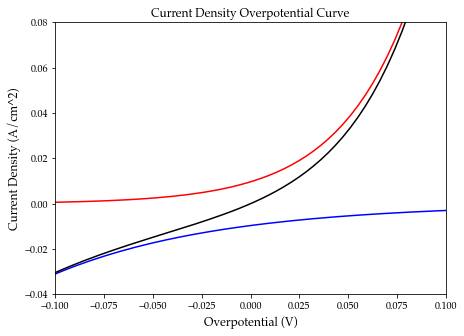

In [117]:
#Plotting for Current Density-Overpotential

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-.04,.08)


plt.plot(Eta,CurrentDensitya, color = 'red')
plt.plot(Eta,CurrentDensityc, color = 'blue')
plt.plot(Eta,CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')



## Tafel Plot

In [127]:

#Deriving log of current density
CurrentDensityTotal = CurrentDensitya+CurrentDensityc
logja = np.log10(abs(CurrentDensitya))
TafelCurrentDensityc = abs(CurrentDensityc)
logjc = np.log10(TafelCurrentDensityc)



Text(0, 0.5, 'Current Density (A/cm^2)')

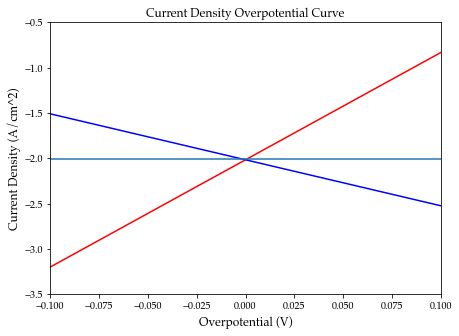

In [144]:
#Plotting for Tafel Plot

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-3.5,-0.5)


plt.plot(Eta,logja, color = 'red')
plt.plot(Eta,logjc, color = 'blue')

plt.axhline(-2.01)
#plt.plot(Eta,logja+logjc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')

# $\iota \eta$ plots


,Potential,Overpotential,Current
0,-1.50,-1.00,0.499999
1,-1.45,-0.95,0.499998
2,-1.40,-0.90,0.499994
3,-1.35,-0.85,0.499983
4,-1.30,-0.80,0.499956
5,-1.25,-0.75,0.499882
6,-1.20,-0.70,0.499688
7,-1.15,-0.65,0.499176
8,-1.10,-0.60,0.497824
9,-1.05,-0.55,0.494279


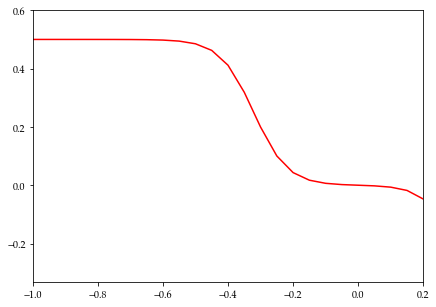

In [169]:
#Constants for 3.3
A = 1
CO2 = 1.0*10**(-3)
CR2 = 1.0*10**(-5)
n=1
a=0.5
kTT=1.0*10**(-4)
f = F/(R*T)
ilc = 1
ila = 1
i0 = ExchangeCurrent(a,kTT, CO2, CR2)

#Creating the DataFrame full of data
Potential = np.arange(-1.5,0.05,.05)
Overpotential = Potential + 0.5
df = pd.DataFrame({'Potential': Potential, 'Overpotential': Overpotential})
df = df.round(3)


def Current(Overpotential, ilc, ila):
    return (np.exp(-a*f*Overpotential)- np.exp((1-a)*f*Overpotential))/ ((1/i0) + (np.exp(-a*f*Overpotential)/ilc) + (np.exp(-a*f*Overpotential)/ila))

CurrentBT = Current(df.Overpotential, 1, 1)
df['Current'] = CurrentBT


fig = plt.figure(figsize = (7,5))

plt.xlim(-1,.2)
plt.ylim(-0.332191,.6)

plt.plot(df.Overpotential,CurrentBT, color = 'red')
df